### Load the data
https://www.kaggle.com/c/bike-sharing-demand
We only need train.csv

### Further Reading
https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

### Setup
~~~~
pip install graphviz
sudo apt-get install graphviz
~~~~

In [59]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data/train.csv')

Show first rows of dataframe

In [3]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

Plot distribution of "count"

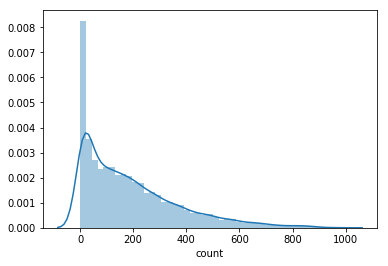

In [4]:
sns.distplot(df['count'])

Select numeric datafields for X, but not the last three columns.
Select 'count' for y.

In [5]:
f_numeric = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
target = ['count']
X = df[f_numeric]
y = df['count']

Create test and training set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a DecisionTreeRegressor.

In [7]:
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(X_train, y_train)

Predict the training set.

In [8]:
y_train_pred = clf.predict(X_train)

Predict the test set.

In [9]:
y_test_pred = clf.predict(X_test)

Calculate the r2 score for the training set.

In [10]:
r2_score(y_train, y_train_pred, multioutput='variance_weighted')

0.19378482850392864

Calculate the r2 score for the test set.

In [11]:
r2_score(y_test, y_test_pred, multioutput='variance_weighted')

0.21012600287875072

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = tree.DecisionTreeRegressor(max_depth=10)
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=f_numeric,  
                         class_names=clf.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeRegressor(max_depth=10)
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=f_numeric,  
                         class_names=clf.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### Homework
* Do the calculation with different max_depth. 
* Plot the performance for different max_depth: Insample (training), Out-of-sample (test)
* Add features from datetime.
  * Time
  * Day of the week
  * ...
* Compare with linear regression.

In [14]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')

In [15]:
scores

array([0.19092954, 0.19560523, 0.18797906, 0.1936043 , 0.19569639])

In [16]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10]
}

In [28]:
grid_search = GridSearchCV(clf, param_grid, scoring='r2', n_jobs=4, cv=3)

In [30]:
grid_search = grid_search.fit(X_train, y_train)

In [31]:
grid_search.cv_results_

/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

{'mean_fit_time': array([0.00713976, 0.00712887, 0.0071973 , 0.01028895, 0.01096225]),
 'mean_score_time': array([0.0013953 , 0.00102067, 0.00081595, 0.00112335, 0.00106303]),
 'mean_test_score': array([0.19370803, 0.26749742, 0.29808606, 0.28889267, 0.19192017]),
 'mean_train_score': array([0.19606868, 0.28328522, 0.34787392, 0.42281571, 0.53319394]),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10}],
 'rank_test_score': array([4, 3, 1, 2, 5], dtype=int32),
 'split0_test_score': array([0.19712684, 0.26954638, 0.29398622, 0.28989053, 0.18466005]),
 'split0_train_score': array([0.19147935, 0.27839671, 0.34329444, 0.42026787, 0.53298739]),
 'split1_test_score': array([0.19087061, 0.27483086, 0.30238118, 0.27942294, 0.17454752]),
 'split1_train_score': array([0.202964

In [32]:
res_df = pd.DataFrame(grid_search.cv_results_)
res_df

/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.007140         0.001395         0.193708          0.196069   
1       0.007129         0.001021         0.267497          0.283285   
2       0.007197         0.000816         0.298086          0.347874   
3       0.010289         0.001123         0.288893          0.422816   
4       0.010962         0.001063         0.191920          0.533194   

  param_max_depth             params  rank_test_score  split0_test_score  \
0               2   {'max_depth': 2}                4           0.197127   
1               4   {'max_depth': 4}                3           0.269546   
2               6   {'max_depth': 6}                1           0.293986   
3               8   {'max_depth': 8}                2           0.289891   
4              10  {'max_depth': 10}                5           0.184660   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.191479           0.190871            0.202964   
1            0.278397           0.274831            0.290088   
2            0.343294           0.302381            0.353539   
3            0.420268           0.279423            0.426020   
4            0.532987           0.174548            0.539406   

   split2_test_score  split2_train_score  std_fit_time  std_score_time  \
0           0.193126            0.193763      0.000560        0.000043   
1           0.258112            0.281371      0.001696        0.000337   
2           0.297891            0.346788      0.000090        0.000041   
3           0.297367            0.422159      0.001037        0.000187   
4           0.216561            0.527188      0.000018        0.000221   

   std_test_score  std_train_score  
0        0.002587         0.004964  
1        0.006977         0.004961  
2        0.003430         0.004252  
3        0.007360         0.002394  
4        0.017904         0.004990

In [35]:
label = "max_depth: " + res_df['param_max_depth'].astype(str)

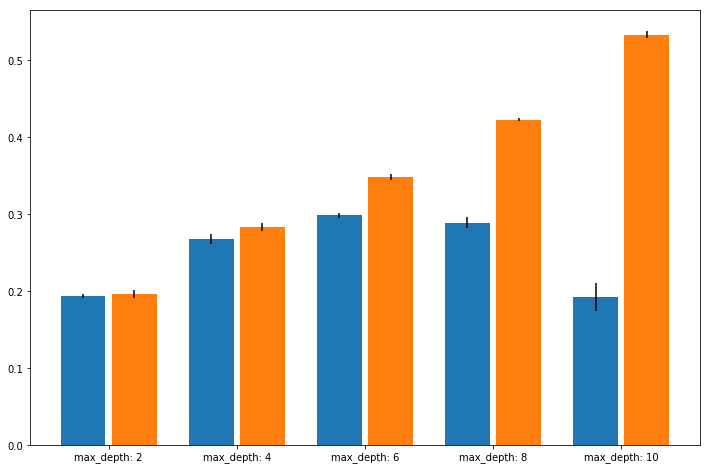

In [36]:
plt.figure(figsize=[12, 8])
plt.bar(res_df.index - 0.2, res_df['mean_test_score'], bottom=0, width = 0.35, yerr=res_df['std_test_score'])
plt.bar(res_df.index + 0.2, res_df['mean_train_score'], bottom=0, width = 0.35, yerr=res_df['std_train_score'])
plt.xticks(res_df.index, label)
plt.show()

In [67]:
clf2 = RandomForestRegressor()
# clf2 = clf2.fit(X_train, y_train)

In [61]:
param_grid2 = {
    'max_depth': [2, 4, 6, 8, 10],
    'n_estimators': [1, 10, 100]
}

In [62]:
grid_search = GridSearchCV(clf2, param_grid2, scoring='r2', n_jobs=4, cv=3)

In [63]:
grid_search = grid_search.fit(X_train, y_train)

In [64]:
res2_df = pd.DataFrame(grid_search.cv_results_)


/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/levin/projects/python-data-science/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

In [65]:
label = ("depth: " + res2_df['param_max_depth'].astype(str) +
    " n_est: " + res2_df['param_n_estimators'].astype(str))

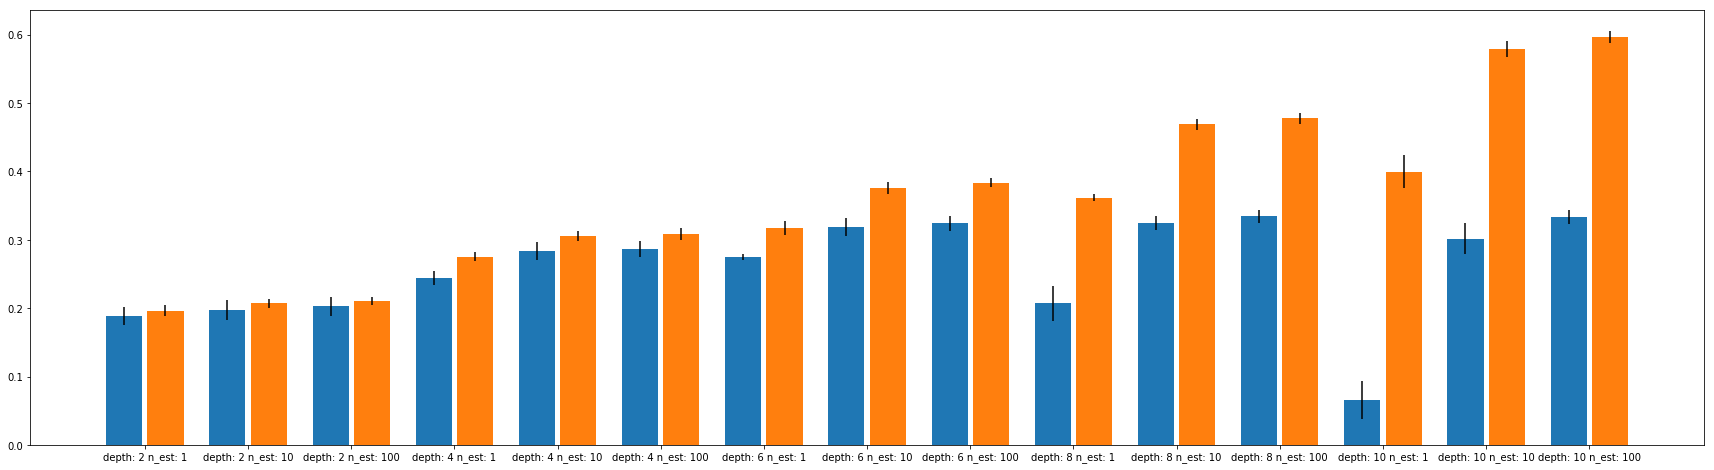

In [66]:
plt.figure(figsize=[30, 8])
plt.bar(res2_df.index - 0.2, res2_df['mean_test_score'], bottom=0, width = 0.35, yerr=res2_df['std_test_score'])
plt.bar(res2_df.index + 0.2, res2_df['mean_train_score'], bottom=0, width = 0.35, yerr=res2_df['std_train_score'])
plt.xticks(res2_df.index, label)
plt.show()